In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer

import gc

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

import nltk

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

from scipy.interpolate import interp1d

%matplotlib inline
pd.set_option('display.width', 1000)
pd.options.display.max_seq_items = 2000
pd.set_option('max_colwidth',500)

In [77]:
def dateYear(date):
    return 

def dateConverter(date):
    
    monthUKFR = dict()
    monthUKFR['janvier'] = 1
    monthUKFR['février'] = 2
    monthUKFR['mars'] = 3
    monthUKFR['avril'] = 4
    monthUKFR['mai'] = 5
    monthUKFR['juin'] = 6
    monthUKFR['juillet'] = 7
    monthUKFR['août'] = 8
    monthUKFR['septembre'] = 9
    monthUKFR['octobre'] = 10
    monthUKFR['novembre'] = 11
    monthUKFR['décembre'] = 12
    
    day = int(re.findall(r'\S+', date)[0])
    month = monthUKFR[re.findall(r'\S+', date)[1]]
    year = int(re.findall(r'\S+', date)[2])
    
    return datetime(year,month,day)



reviews=pd.read_csv('reviews.csv', encoding = 'utf-8')
reviews['reviewYear'] = reviews.reviewDate.apply(lambda x: dateConverter(x))
#reviews_fr = reviews[reviews['language'] == 'fr']
reviews_en = reviews[reviews['language'] == 'en']

trained_reviews=pd.read_excel('trained_sentences.xls',encoding = 'utf-8')



In [3]:
class barometre:
    
    def __init__(self, reviews):
        self.reviews = reviews
        self.categories = dict()
    
    def addCategory(self, name, words):
        #ajoute une nouvelle catégorie au baromètre. Les catégories sont définies par un groupe de mots.
        self.categories[name] = words
    
    def vectorizeReviews(self):
        self.vect = CountVectorizer(lowercase=True, preprocessor=None, token_pattern=r'\b\w+\b', ngram_range=(1, 2), max_df=.8, min_df=1)
        self.vectM = self.vect.fit_transform(self.reviews.reviewDescription)
        
    def tagCat(self,catName):
        for w in self.categories[catName]:
            vocab = self.vect.vocabulary_.get(w) #la colonne du mot de la catégorie
            slice = self.vectM[:,vocab].toarray() #l'ensemble des reviews contenant ce mot
            if catName in baro.reviews.columns:
                baro.reviews[catName] =(baro.reviews[catName].values | (slice > 0)) #création d'une colonne du nom de la catégorie
            else:
                baro.reviews[catName] = (slice > 0) #création d'une colonne du nom de la catégorie
            
    def plotCat(self):
        d = self.reviews.loc[:,self.categories.keys()] #reviews filtrées sur les catégories
        d = d[d.sum(axis=1) > 0] #reviews qui ont été taggés au moins une fois
        df = pd.concat([d, self.reviews.reviewYear.apply(lambda x: (x.year, x.month))], axis=1, join_axes=[d.index] ) #ajout de l'année
        valeurs = (df.groupby('reviewYear').sum()/
                   self.reviews.groupby(self.reviews.reviewYear.apply(lambda x: (x.year, x.month))).count()).loc[:,self.categories.keys()] #décompte du nombre par an
        
        valeurs = valeurs.dropna()
        
        x = valeurs.index.values
        
        print(valeurs)
      
        
        y1 = valeurs.iloc[:,0]
        y2 = valeurs.iloc[:,1]
        y3 = valeurs.iloc[:,2]
       
        
        xd = [datetime(t[0],t[1],1) for t in x]
    
        plt.style.use('ggplot')
        
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.stackplot(xd, y1*100, y2*100, y3*100)

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

        fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels)
        
        
    def printWord(self, word):
        vocab = self.vect.vocabulary_.get(word) #la colonne du mot de la catégorie
        slice = self.vectM[:,vocab].toarray() #l'ensemble des reviews contenant ce mot
        print(self.reviews[slice > 1]['reviewDescription'])

    def info(self):
        return self.reviews.groupby(list(self.categories.keys())).reviewDescription.count()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             culture  workplace       pay
reviewYear                               
(2011, 11)  0.000000   0.500000  0.000000
(2011, 12)  0.000000   0.111111  0.000000
(2012, 1)   0.000000   0.142857  0.000000
(2012, 2)   0.000000   0.173913  0.000000
(2012, 3)   0.000000   0.068966  0.022989
(2012, 4)   0.000000   0.120000  0.000000
(2012, 5)   0.000000   0.142857  0.019048
(2012, 6)   0.000000   0.142857  0.023810
(2012, 7)   0.000000   0.092437  0.008403
(2012, 8)   0.000000   0.108333  0.008333
(2012, 9)   0.000000   0.126050  0.008403
(2012, 10)  0.000000   0.096296  0.007407
(2012, 11)  0.000000   0.126437  0.022989
(2012, 12)  0.012987   0.155844  0.038961
(2013, 1)   0.000000   0.154362  0.006711
(2013, 2)   0.000000   0.130081  0.000000
(2013, 3)   0.000000   0.088435  0.006803
(2013, 4)   0.000000   0.163399  0.026144
(2013, 5)   0.000000   0.163265  0.013605
(2013, 6)   0.006173   0.111111  0.000000
(2013, 7)   0.000000   0.086735  0.010204
(2013, 8)   0.000000   0.105882  0

culture  workplace  pay  
False    False      False    11088
                    True       272
         True       False     1697
                    True        41
True     False      False        8
         True       False        2
Name: reviewDescription, dtype: int64

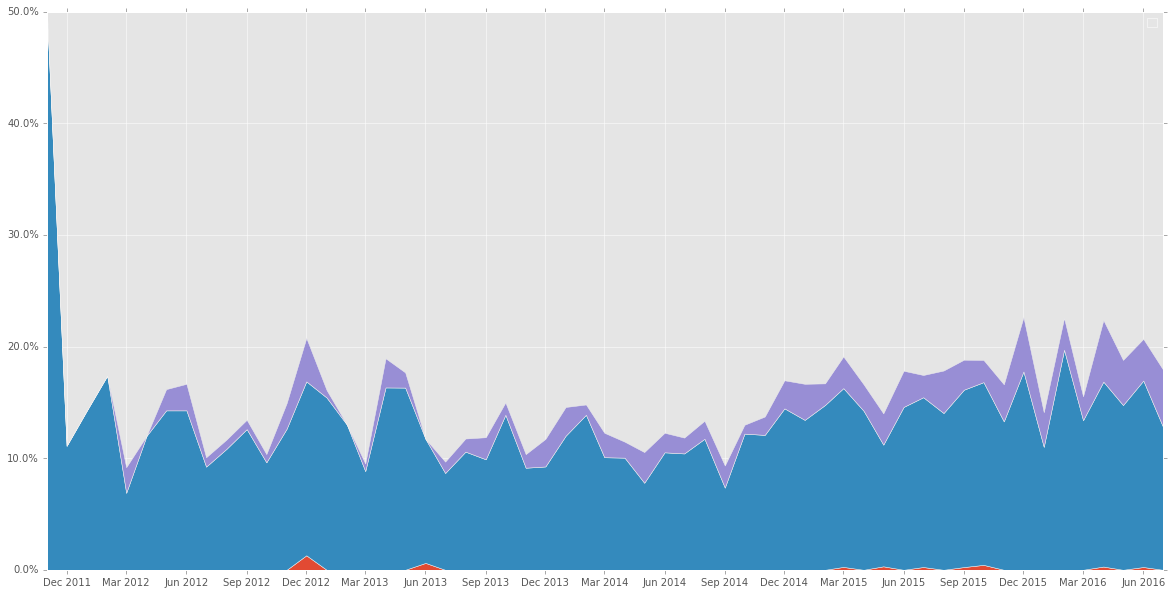

In [4]:
baro = barometre(reviews_en)
baro.addCategory('culture',['culture', 'mindset'])
baro.vectorizeReviews()
baro.addCategory('workplace',['work environment', 'workplace','environment'])
baro.addCategory('pay',['pay', 'remuneration','wage','compensation','salary'])

baro.tagCat('workplace')
baro.tagCat('culture')
baro.tagCat('pay')
baro.plotCat()
baro.info()
#baro.printWord('work')

In [ ]:
baro.reviews[baro.reviews[list(baro.categories.keys())].apply(lambda x: x.max(), axis=1) == 0]['reviewDescription']

In [ ]:
 for w in baro.categories['culture']:
    print(w)
    vocab = baro.vect.vocabulary_.get(w) #la colonne du mot de la catégorie
    slice = baro.vectM[:,vocab].toarray() #l'ensemble des reviews contenant ce mot
    print((slice > 0).sum())
    '''
    if 'culture' in baro.reviews.columns:
        print('in columns')
        baro.reviews['culture'] = np.logical_or(baro.reviews['culture'].values, (slice > 0)) #création d'une colonne du nom de la catégorie
    else:
        print('not in columns')
        baro.reviews['culture'] = (slice > 0) #création d'une colonne du nom de la catégorie
    '''

In [104]:
sep = int(train.shape[0]*0.7)

xtrain = train.sentence[:sep]
xtest = train.sentence[sep:]

ytrain = train['work culture'][:sep] #reviews filtrées sur les catégories
ytest  = train['work culture'][sep:]

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(lowercase=True,min_df=1, max_df=.8)),
                     ('TFIDF', TfidfTransformer()),
                     ('clf', MultinomialNB(alpha=0.1))])
text_clf = text_clf.fit(xtrain, ytrain)

predicted = text_clf.predict(xtest)
print(metrics.classification_report(ytest, predicted))

             precision    recall  f1-score   support

        0.0       0.86      0.82      0.84        51
        1.0       0.47      0.53      0.50        15

avg / total       0.77      0.76      0.76        66



In [ ]:

# train word2vec on all the texts - both training and test set
# we're not using test labels, just texts so this is fine
model = Word2Vec(reviews_en.reviewDescription, size=100, window=5, min_count=5, workers=2)
model.index2word
w2v = {w: vec for w, vec in zip(model.index2word, model.syn0)}

In [89]:

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer

In [94]:
train= trained_reviews[trained_reviews.isnull().sum(axis=1)<7]
train.fillna(value=0, inplace=1)
train.describe()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:2824: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,package & benefits,work culture,job description & take outs,relationship with management,team,general appreciation,career & progression
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.063636,0.240909,0.313636,0.090909,0.122727,0.231818,0.059091
std,0.244661,0.428610,0.465029,0.288135,0.328872,0.422956,0.236333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
train

,sentence,package & benefits,work culture,job description & take outs,relationship with management,team,general appreciation,career & progression
0,EY is a fast paced Auditing firm where you can experience alot of learning growth,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,There are varied responsiblilites depending on what client you are assigned too,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Management is very supportive in your growth,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Co-workers will often step in assist on assignments,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,job is turn over of clients and out sourcing of jobs,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Had a great time,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Perfect Work culture with equal importance to all employees,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,"The company believes in ""Employee as an Asset"" values",0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Lots of flexibility and accountability provided to its pratitioner's,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,Good compentation,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Export a subset of the reviews

In [71]:
r = reviews_en.reviewDescription.sample(frac=0.1).str.split('.').values
#r[0:1000]
s = [item for sublist in r for item in sublist if len(item)>5]
s[0:1000]
#s.to_csv('phrases.csv')
import csv
resultFile = open("sentences.csv",'w', encoding="utf-8")
wr = csv.writer(resultFile, delimiter=';', quotechar='"')
wr.writerow(s)

['EY is a fast paced Auditing firm where you can experience alot of learning growth',
 ' There are varied responsiblilites depending on what client you are assigned too',
 ' Management is very supportive in your growth',
 ' Co-workers will often step in assist on assignments',
 ' job is turn over of clients and out sourcing of jobs',
 'Had a great time ',
 ' Perfect Work culture with equal importance to all employees',
 'Deloitte is a great organizations for any level of candidate',
 ' The company believes in "Employee as an Asset" values',
 " Lots of flexibility and accountability provided to its pratitioner's",
 ' Good compentation',
 'Awesome culture and people at Deloitte that is what it differentiates from other corporates',
 ' Flexibility to work-from-home',
 ' Open door policy',
 ' One can directly go to top level management in case of any queries',
 ' When U',
 ' people visits the country we can get involved with them more and they are really supportive and helpful',
 'Great pl

338774